## Importing Libraries

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [38]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_auc_score, confusion_matrix, roc_curve, auc
from sklearn.svm import SVC

## Loading Dataset

In [39]:
df = pd.read_csv("Fraud.csv")

In [40]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [41]:
df.tail()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.0,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.0,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.0,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.0,C2080388513,0.00,0.00,1,0
6362619,743,CASH_OUT,850002.52,C1280323807,850002.52,0.0,C873221189,6510099.11,7360101.63,1,0


In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


### Feature Description

**step** - maps a unit of time in the real world. In this case 1 step is 1 hour of time. Total steps 744 (30 days simulation).

**type** - CASH-IN, CASH-OUT, DEBIT, PAYMENT and TRANSFER.

**amount** - amount of the transaction in local currency.

**nameOrig** - customer who started the transaction

**oldbalanceOrg** - initial balance before the transaction

**newbalanceOrig** - new balance after the transaction

**nameDest** - customer who is the recipient of the transaction

**oldbalanceDest** - initial balance recipient before the transaction. Note that there is not information for customers that 
                 start with M (Merchants).

**newbalanceDest** - new balance recipient after the transaction. Note that there is not information for customers that start 
                 with M (Merchants).

**isFraud** - This is the transactions made by the fraudulent agents inside the simulation. In this specific dataset the 
          fraudulent behavior of the agents aims to profit by taking control or customers accounts and try to empty the 
          funds by transferring to another account and then cashing out of the system.

**isFlaggedFraud** - The business model aims to control massive transfers from one account to another and flags illegal attempts. 
                 An illegal attempt in this dataset is an attempt to transfer more than 200.000 in a single transaction.

In [43]:
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


## Finding NULL/Missing Values

In [44]:
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

It appears that the provided dataset has no NULL or Missing Values.

**Insights**

There are no null values and duplicate rows - no imputation necessary.<br><br>
There are over 6 million transaction details.<br><br>
There are 11 variables.<br><br>
There are instances where there is a 'TRANSFER' followed by 'CASH_OUT', both for the same amount, and both transactions are<br><br> flagged as fraud (observed in the first 5 rows and last 5 rows).<br><br>
From the first 5 rows and last 5 rows, all transactions with newbalanceOrig = 0 are Fraudulent transactions.<br><br>
From the last 5 rows, no transactions that were "TRANSFER" with amount > 200,000 currency units were Flagged as Fraud.<br><br>
The flagging system may not be effective.

In [45]:
df.nunique()

step                  743
type                    5
amount            5316900
nameOrig          6353307
oldbalanceOrg     1845844
newbalanceOrig    2682586
nameDest          2722362
oldbalanceDest    3614697
newbalanceDest    3555499
isFraud                 2
isFlaggedFraud          2
dtype: int64

In [46]:
df.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

## Data Preprocessing

In [47]:
df['type'].value_counts()

CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: type, dtype: int64

In [48]:
df['isFraud'].value_counts()

0    6354407
1       8213
Name: isFraud, dtype: int64

The dataset seems to be highly Biased, we need to undersample it.<br>8000+ Entries should be enough to train any model.<br>
We reduce the entries from 6 Million+ to only just 8000+ Entries for each columns.

In [49]:
df['isFlaggedFraud'].value_counts()

0    6362604
1         16
Name: isFlaggedFraud, dtype: int64

The data is highly biased for this particular feature. We can choose to drop it completely.

In [50]:
df.drop("isFlaggedFraud", axis=1, inplace=True)

In [51]:
df.nunique()

step                  743
type                    5
amount            5316900
nameOrig          6353307
oldbalanceOrg     1845844
newbalanceOrig    2682586
nameDest          2722362
oldbalanceDest    3614697
newbalanceDest    3555499
isFraud                 2
dtype: int64

### Before Undersampling

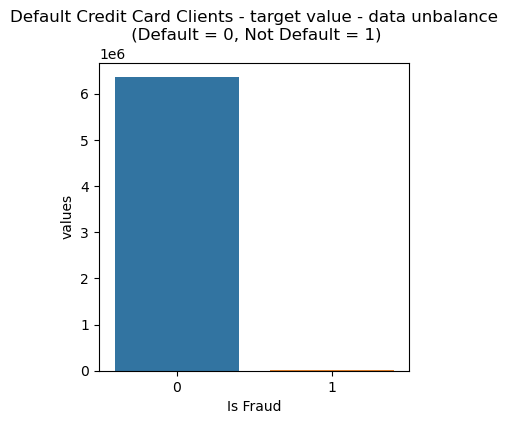

In [52]:
temp = df["isFraud"].value_counts()
df1 = pd.DataFrame({'Is Fraud': temp.index,'values': temp.values})
plt.figure(figsize = (4,4))
plt.title('Default Credit Card Clients - target value - data unbalance\n (Default = 0, Not Default = 1)')
sns.set_color_codes("pastel")
sns.barplot(x = 'Is Fraud', y="values", data=df1)
locs, labels = plt.xticks()
plt.show()

### Undersampling Function

In [53]:
from imblearn.under_sampling import RandomUnderSampler

# Separate features and target
features = df.drop('isFraud', axis=1)
target = df['isFraud']

# Apply random undersampling
rus = RandomUnderSampler(random_state=42)
undersampled_features, undersampled_target = rus.fit_resample(features, target)

# Combine undersampled features and target into a DataFrame
df = pd.DataFrame(undersampled_features, columns=features.columns)
df['isFraud'] = undersampled_target

### After Undersampling

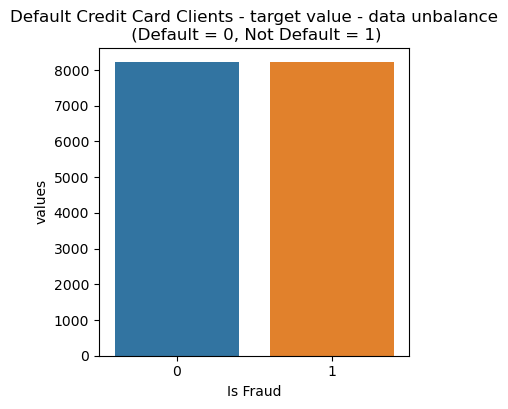

In [54]:
temp = df["isFraud"].value_counts()
df1 = pd.DataFrame({'Is Fraud': temp.index,'values': temp.values})
plt.figure(figsize = (4,4))
plt.title('Default Credit Card Clients - target value - data unbalance\n (Default = 0, Not Default = 1)')
sns.set_color_codes("pastel")
sns.barplot(x = 'Is Fraud', y="values", data=df1)
locs, labels = plt.xticks()
plt.show()

**Now the data is free of any Biased entries.**

In [55]:
df.nunique()

step                743
type                  5
amount            12185
nameOrig          16426
oldbalanceOrg      9410
newbalanceOrig     3712
nameDest          16235
oldbalanceDest     7626
newbalanceDest     9166
isFraud               2
dtype: int64

In [56]:
df['type'].value_counts()

CASH_OUT    7066
TRANSFER    4750
PAYMENT     2735
CASH_IN     1825
DEBIT         50
Name: type, dtype: int64

### Checking for Outliers

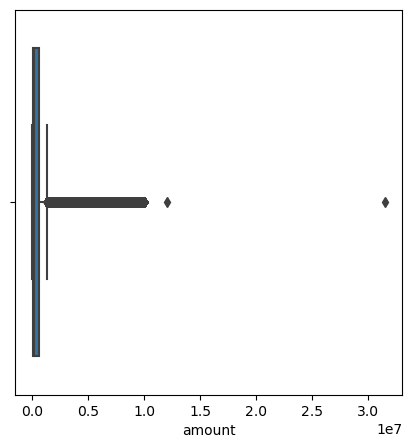

In [57]:
# Checking outliers in 'amount' column

plt.figure(figsize=(5,5))
ax = sns.boxplot(x="amount", data=df)

## EDA

<Axes: ylabel='type'>

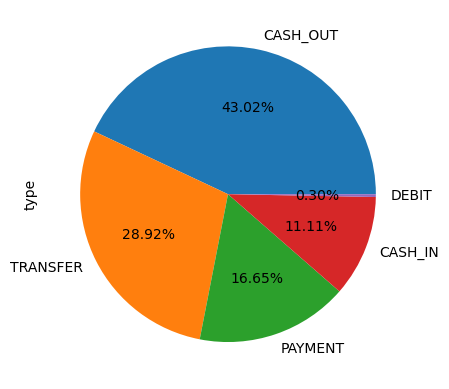

In [58]:
df["type"].value_counts().plot(kind="pie", autopct="%.2f%%")

In [59]:
df['isFraud'].value_counts()

0    8213
1    8213
Name: isFraud, dtype: int64

In [60]:
# Define the outlier detection threshold
threshold = 1.5

# Calculate the IQR for each feature
Q1 = df.quantile(0.10)
Q3 = df.quantile(0.90)
IQR = Q3 - Q1

# Define the lower and upper bounds for outlier detection
lower_bound = Q1 - threshold * IQR
upper_bound = Q3 + threshold * IQR

# Remove outliers based on the lower and upper bounds
df = df[~((df < lower_bound) | (df > upper_bound)).any(axis=1)]

C:\Users\PREDATOR\AppData\Local\Temp\ipykernel_5308\1656217317.py:5: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q1 = df.quantile(0.10)
C:\Users\PREDATOR\AppData\Local\Temp\ipykernel_5308\1656217317.py:6: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q3 = df.quantile(0.90)
C:\Users\PREDATOR\AppData\Local\Temp\ipykernel_5308\1656217317.py:14: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  df = df[~((df < lower_bound) | (df > upper_bound)).any(axis=1)]


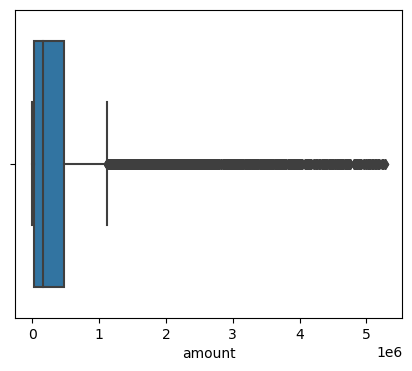

In [61]:
plt.figure(figsize=(5,4))
ax = sns.boxplot(x="amount", data=df)

In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14184 entries, 0 to 16424
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   step            14184 non-null  int64  
 1   type            14184 non-null  object 
 2   amount          14184 non-null  float64
 3   nameOrig        14184 non-null  object 
 4   oldbalanceOrg   14184 non-null  float64
 5   newbalanceOrig  14184 non-null  float64
 6   nameDest        14184 non-null  object 
 7   oldbalanceDest  14184 non-null  float64
 8   newbalanceDest  14184 non-null  float64
 9   isFraud         14184 non-null  int64  
dtypes: float64(5), int64(2), object(3)
memory usage: 1.2+ MB


In [63]:
df['type'].value_counts()

CASH_OUT    6367
TRANSFER    4273
PAYMENT     2713
CASH_IN      785
DEBIT         46
Name: type, dtype: int64

### Converting Categorical Feature to Numerical

In [64]:
df['type'].replace(['CASH_OUT', 'CASH_IN', 'PAYMENT', 'TRANSFER', 'DEBIT'],
                        [0, 1, 2, 3, 4], inplace=True)

**0** - CASH_OUT<br>
**1** - CASH_IN<br>
**2** - PAYMENT<br>
**3** - TRANSFER<br>
**4** - DEBIT

In [65]:
df['type'].value_counts()

0    6367
3    4273
2    2713
1     785
4      46
Name: type, dtype: int64

In [66]:
df['isFraud'].value_counts()

1    7327
0    6857
Name: isFraud, dtype: int64

In [67]:
# From the Feature Description we can say that the features 'nameOrig' and 'nameDest' are irrelevant
# Since both have String Dtype, training model on it is difficult

df = df.drop(['nameOrig','nameDest'], axis=1)

## Logistic Regression (GridSearchCV)

In [68]:
df_log_reg = df.copy()

In [69]:
df_log_reg.head()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
0,162,0,183806.32,19391.00,0.00,382572.19,566378.51,0
1,137,2,521.37,0.00,0.00,0.00,0.00,0
2,179,2,3478.18,19853.00,16374.82,0.00,0.00,0
3,355,2,1716.05,5769.17,4053.13,0.00,0.00,0
5,321,2,24768.57,21573.00,0.00,0.00,0.00,0


In [70]:
X = df_log_reg.drop('isFraud',axis=1)
y = df_log_reg['isFraud']

In [71]:
columns = X.columns

In [72]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [73]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42, stratify = y)

In [74]:
param_grid = {'penalty':['l1','l2'], 'C' : [0.001, 0.01, 0.1, 1, 10, 100, 1000]}

In [75]:
grid_lr_clf = GridSearchCV(LogisticRegression(), param_grid, scoring = 'accuracy', n_jobs = -1, verbose = 3, cv = 3)
grid_lr_clf.fit(X_train, y_train)

Fitting 3 folds for each of 14 candidates, totalling 42 fits


C:\Users\PREDATOR\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
21 fits failed out of a total of 42.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
21 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\PREDATOR\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\PREDATOR\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\PREDATOR\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 54, in _check_solver
    raise Value

GridSearchCV(cv=3, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'penalty': ['l1', 'l2']},
             scoring='accuracy', verbose=3)

In [76]:
optimized_clf = grid_lr_clf.best_estimator_

In [77]:
grid_lr_clf.best_params_

{'C': 1000, 'penalty': 'l2'}

In [78]:
grid_lr_clf.best_score_

0.9559819613693558

In [79]:
# Predicted Probability
train_preds = optimized_clf.predict_proba(X_train)[:,1]
test_preds = optimized_clf.predict_proba(X_test)[:,1]

In [80]:
# Get the predicted classes
train_class_preds = optimized_clf.predict(X_train)
test_class_preds = optimized_clf.predict(X_test)

In [81]:
# Get the accuracy scores
train_accuracy_lr = accuracy_score(train_class_preds,y_train)
test_accuracy_lr = accuracy_score(test_class_preds,y_test)

print("The accuracy on train data is ", train_accuracy_lr)
print("The accuracy on test data is ", test_accuracy_lr)

The accuracy on train data is  0.9540692989524577
The accuracy on test data is  0.9534774436090225


In [82]:
test_accuracy_lr = accuracy_score(test_class_preds,y_test)
test_precision_score_lr = precision_score(test_class_preds,y_test)
test_recall_score_lr = recall_score(test_class_preds,y_test)
test_f1_score_lr = f1_score(test_class_preds,y_test)
test_roc_score_lr = roc_auc_score(test_class_preds,y_test)

print("The accuracy on test data is ", test_accuracy_lr)
print("The precision on test data is ", test_precision_score_lr)
print("The recall on test data is ", test_recall_score_lr)
print("The f1 on test data is ", test_f1_score_lr)
print("The roc_score on test data is ", test_roc_score_lr)

The accuracy on test data is  0.9534774436090225
The precision on test data is  0.9245111414279218
The recall on test data is  0.9845036319612591
The f1 on test data is  0.9535647279549719
The roc_score on test data is  0.9543695704306524


[[4685  115]
 [ 341 4787]]


[Text(0, 0.5, 'Not Defaulter'), Text(0, 1.5, 'Defaulter')]

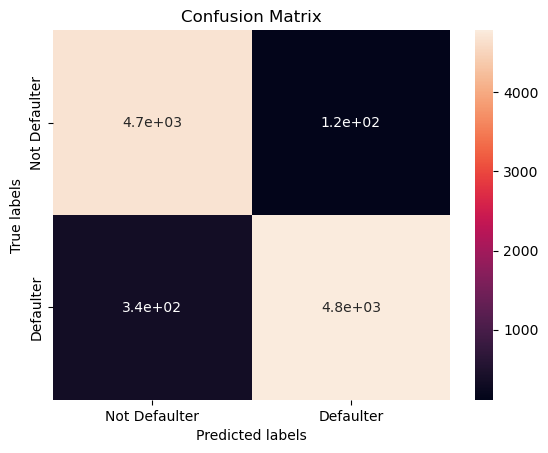

In [83]:
# Get the confusion matrix for both train and test

labels = ['Not Defaulter', 'Defaulter']
cm = confusion_matrix(y_train, train_class_preds)
print(cm)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax) #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

In [84]:
feature_importance = pd.DataFrame({'Features':columns, 'Importance':np.abs(optimized_clf.coef_).ravel() })

In [85]:
feature_importance = feature_importance.sort_values(by = 'Importance', ascending=False)[:10]

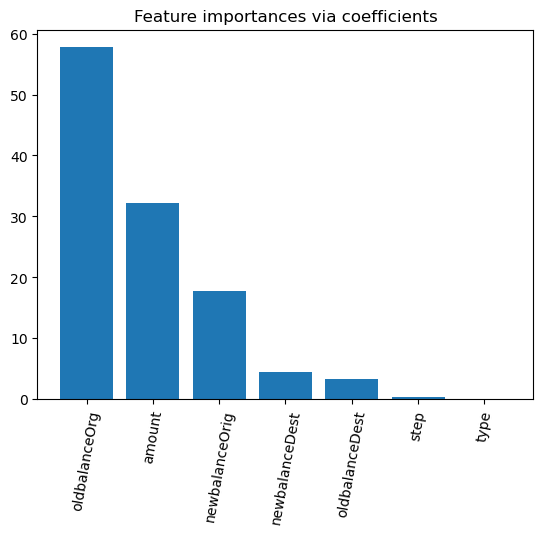

In [86]:
plt.bar(height=feature_importance['Importance'], x= feature_importance['Features'])
plt.xticks(rotation=80)
plt.title("Feature importances via coefficients")
plt.show()

In [87]:
y_preds_proba_lr = optimized_clf.predict_proba(X_test)[::,1]

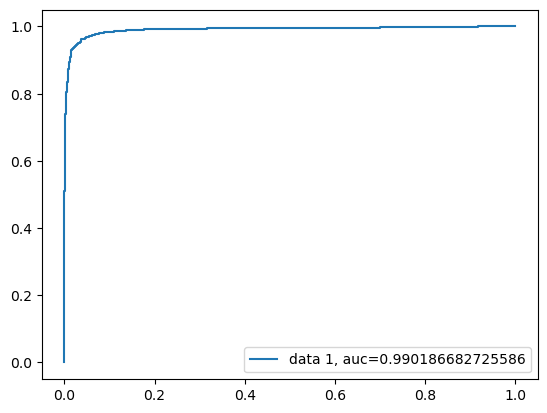

In [88]:
y_pred_proba = y_preds_proba_lr
fpr, tpr, _ = roc_curve(y_test,  y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()